In [1]:
#install tensorflow
%tensorflow_version 2.x
import tensorflow as tf


In [2]:
#upload Google Drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import Libraries
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [4]:
#create path
train_loc = '/content/drive/MyDrive/our_Data/train'
test_loc = '/content/drive/MyDrive/our_Data/val'

In [6]:
#resize Images and Data Augmentions
#trdata = train_data
#tsdata = test_data
trdata = ImageDataGenerator(
                            rescale=1./255, #Makes pixel values ​​between 0 and 1 = Normalization
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(
                            rescale = 1./255, #Makes pixel values ​​between 0 and 1 = Normalization
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))


Found 489 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [7]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [10]:
#Define Inputs Iamges
input_shape = (224,224,3)

#Create The Network

#Input Layer
img_input = Input(shape = input_shape, name ='img_input')

#Build The Model
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_input)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [27]:
#Generate the Model
model = Model(inputs = img_input, outputs = x , name = 'COVID-19')

In [28]:
#Show Network Structre
model.summary()

Model: "COVID-19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)        0  

In [29]:
#Compile the Model
model.compile(optimizer='adam', 
              loss=binary_crossentropy, 
              metrics=['accuracy'])

In [30]:
#Train and Test
batch_size = 32 # take 32 img from train data Then go back and forth , and each of epoch take iteration (to update width, loss fun, acc)
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,
                 validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
15/15 [==============================] - 354s 23s/step - loss: 1.2622 - accuracy: 0.7374 - val_loss: 0.6313 - val_accuracy: 0.8854
Epoch 2/10
15/15 [==============================] - 27s 2s/step - loss: 0.3845 - accuracy: 0.8534 - val_loss: 0.3402 - val_accuracy: 0.8854
Epoch 3/10
15/15 [==============================] - 26s 2s/step - loss: 0.2243 - accuracy: 0.9234 - val_loss: 0.3579 - val_accuracy: 0.8750
Epoch 4/10
15/15 [==============================] - 26s 2s/step - loss: 0.2138 - accuracy: 0.9322 - val_loss: 0.2587 - val_accuracy: 0.8958
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 0.1333 - accuracy: 0.9562 - val_loss: 0.1936 - val_accuracy: 0.9323
Epoch 6/10
15/15 [==============================] - 26s 2s/step - loss: 0.1556 - accuracy: 0.9584 - val_loss: 0.2300 - val_accuracy: 0.9427
Epoch 7/10
15/15 [==============================] - 26s 2s/step - loss: 0.1198 - accuracy: 0.9650 - val_loss: 0.3685 - val_accuracy: 0.9115
Epoch 8/10
15/15 [

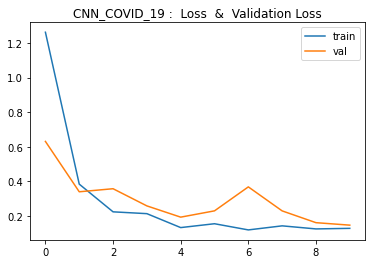

In [31]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

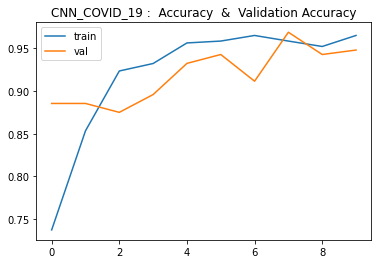

In [32]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[ 15  44]
 [ 42 119]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.26      0.25      0.26        59
      COVID-       0.73      0.74      0.73       161

    accuracy                           0.61       220
   macro avg       0.50      0.50      0.50       220
weighted avg       0.60      0.61      0.61       220



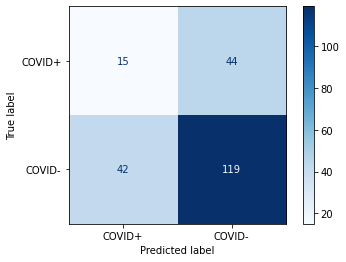

In [33]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1) # to Max predict

#cm = confusion matrix
cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()
